# Algorithm & Metric Deep Dive - Making appropriate choices for your problem

## Overview 

In the previous notebook, we built a machine learning pipeline containing all the important elements we would find in any sophisticated, real world pipeline, but in our example we used quite simple components for each step. Even still, there were quite a number of *hyperparameters* we had to choose along the way, without having understood what we were choosing and why, or more importantly, understanding what would be a good choice for our particular problem and the dataset. This notebook will attempt to give a little insight into how key ML algorithms work with the aim of giving some basic understanding of what the hyperparameters mean and how they influence the end result. This will hopefully be a starting point for making appropriate choices of algorithm, hyperparameters and metrics. 


### Prerequisites
* Completed notebooks 1 & 2

### Learning Outcomes 

* Understand mechanisms of key tree based and neural network algorithms
* Understand key hyperparameters and how to choose them
* Understand key metrics and how to select the right one for your problem

### Links to Best practices and Values
* ML Pitfalls - Avoid problems such as overfitting and underfitting through appropriate choice of algorithms and hyperparameters
* Ethics - Be able to justify your choices for what you have implemented
* ML Lifecycle - Ensure you are able to reproduce results

(Please see [Met Office Best Prctice Summary document](https://metoffice.sharepoint.com/:w:/r/sites/MetOfficeDataScienceCommunity/Shared%20Documents/MLAG/project_evaluation_review/MachineLearningBestPracticesAndValues_v1_0.docx?d=wae2554217d0342f2a9c8cf8906bfbe38&csf=1&web=1&e=ja7rLn) on Data Science Community site (internal only) for more information and further reading.)


### Data Science Framework

The following example problems in these notebooks connect to the capabilities of the Met Office Data Science Framework in the following ways:
* Radiation emulation - Fusing Simulation and Data Science
* XBT - Uncertainty and Trust
* Rotors - Data to Decisions
* Weather regimes - Discovery and Attribution

Further Reading
* [Data Science Framework](https://www.metoffice.gov.uk/research/foundation/informatics-lab/met-office-data-science-framework)


## Tutorial - Decision Trees

The first algorithm we will look at in detail is the family of algorithms based on decision trees. A decision tree is basically a flow chart where at each node a question is asked of the data and you proceed along one branch until you run out of nodes, you are then presented with an answer for the end point in the flowchart that you have reached. Below we have an example of such a "manually created" decision tree, where expert judgement has informed the questions of the data. In this case, metadata around a set of ocean observations is being queried, to be able to infer what sort of probe was used to make the measurement. So a question being asked in the flowchart is "Was the measurement made by a certain set of countries" or "Was the maximum depth of the measurement within one of several specified range"? Following the flowchart to the end we get an answer about which type of probe the expert thinks that measurement has come from. In decision trees, a training algorithm constructs such a series of questions from the data.

![An example of manually created flowchart for making decisions, similar to the structure of the decision tree.](images/xbt_imeta_flowchart.png)

To start with lets explain some key terminology for decision trees:
* *Root node* - The base node of the decision tree.
* *Splitting* - The process of dividing a node into multiple sub-nodes.
* *Decision node* - When a sub-node is further split into additional sub-nodes.
* *Leaf node* - When a sub-node does not further split into additional sub-nodes; represents possible outcomes.
* *Pruning* - The process of removing sub-nodes of a decision tree.
* *Branch* - A subsection of the decision tree consisting of multiple nodes.
* *Hyperparameters*
  * *Max depth* -  The maximum number of levels in the tree, i.e. the maximum number of decision nodes before an answer is reached.
  * *Minimum leaf node samples* - The minimum number of data samples in the training dataset that can be assigned to a leaf node, if splitting would result in fewer data points for the leaf node, then splitting will not occur.
  * **
![Image of tree](https://miro.medium.com/max/1400/1*3P1333UmqEww6YMpjisj4Q.png)

(from article https://towardsdatascience.com/decision-trees-explained-3ec41632ceb6 )

### Training a decision tree

The decision tree is constructed with an algorithm that recursively splits nodes based on a criteria until some or other constraints are reached, such as max depth or min leaf sample hyperparameters. In the decision tree, the nodes are split into sub-nodes on the basis of a threshold value of an attribute, considering one node and one attribute at a time. ([Source of quote](https://www.analyticssteps.com/blogs/classification-and-regression-tree-cart-algorithm) )

The procedure is approximately as follows

* Start with all training data points in the root node, which is also a leaf node to begin with.
* Go through current leaf nodes considering  whether to split into a decision node and 2 leaf nodes.
* At each leaf node, consider each of the features in turn e.g. year, max depth, country
* For categorical features, consider each of the potential values. 
* For continuous variable, find an appropriate threshold value on which to split the data
* Calculate the value of the information metric for each potential split e.g. entropy, Gini Index. 
* The node split that provides the biggest increase or decrease (depending on the specific metric) in the value at that node is chosen as the branching criteria for a new decision node to replace the leaf node. The CART algorithm does that by searching for the best homogeneity for the sub-nodes, with the help of the Gini Index criterion. 
* The data points at this leaf node are divided between two new leaf nodes, for one of the outcomes of the decision criteria (e.g. max_depth < 400m or max depth >=- 400m).
* move onto next available leaf node until constrain has been reached.

More information on the details of the Maths behind training a decision tree is are available here: [Maths of CART algorithm](https://towardsdatascience.com/the-mathematics-of-decision-trees-random-forest-and-feature-importance-in-scikit-learn-and-spark-f2861df67e3)

Key training terms
* Greedy algorithm -  an algorithm that consider leaf nodes one at a time, rather than optimising globally.
* Stopping criteria - The criteria for stopping the recursive splitting of nodes, for example max tree depth
* Pruning - A complimentary process of cutting off branches of the decision to simplify it. Sophisticated algorithms can cycle between splitting and pruning operations.

### Pros and Cons of Decision Trees

Advantages:
* Works for numerical or categorical data and variables.
* Models problems with multiple outputs.
* Requires less data cleaning than other data modeling techniques. 
* Easy to explain to those without an analytical background. 

Disadvantages: 
* Affected by noise in the data.
* Not ideal for large datasets.
* Can disproportionately value, or weigh, attributes.
* The decisions at nodes are limited to binary outcomes, reducing the complexity that the tree can handle. Trees can become very complex when dealing with uncertainty and numerous linked outcomes. 


### Variations on a decision tree

While standard decision trees are efficient and powerful tools, as noted above the do have limitations and flaws. Variations on these have been developed to overcome some of these limitations.

* *Random Forests* are ensembles of decision trees where each tree in the forest is trained on different subset of the data (bootstrapping) and subset of the features (bagging). In a classification problem, each tree votes for a classification and the result is the one with the most votes.
* *Gradient boosted trees* use a more complicated method for joining together the output of the ensemble of decision trees, explicitly modeling a loss function and the gradient of the loss function. The gradient boosting is applied to this function, together with the random selection of input data and features used in random forests. For more info on the technical details, please see the links below.
* Xgboost - Standing for eXtreme-Gradient-boosted trees,  this is the current state of the art in ensemble tree-based methods.
Random forest discussion 
Deals with variance Leo breiman
Key terms
* Bagging - Selecting a subset of the input features for training each decision tree in an ensemble.
* Bootstrapping - Selecting a random subset of the data points to separately train each decision tree in an ensemble.
* Aggregation - Bringing together the results of an ensemble to produce a single classification or regression output/ result.
* Ensemble model - A model that joins many lower-performance models together to achieve better performance of the ensemble. This can also be used to determine probabilistic  (or pseudo-probabilistic) information from the ensemble of classifiers.








## Exercise 1: Decision Trees - XBT classification
In this example, we will use a dataset from a project to fill in missing metadata. The data comes from the World Ocean Database (WOD), which contains a variety of ocean observations. The dataset of interest comes eXpendable BathyThermograph probes, which take temperature profiles through the ocean, as radisondes do for the atmosphere. These have been used for several decades, dropped off the back of ships, often providing measurements in observation sparse regions. As a result they have an important role in understanding climate change, as the ocean absorb up to 90% of the warming due to global warming, andXBTs provide measurements of ocean temperature, which is a proxy for ocean heat content. 

Like all observations, they have biases that need correcting for inclusion in a global dataset. These corrections need metadat information, such as what sort of XBT probe was used, to do the bias correction as different probes have different bias profiles. These devides were not originally intended to make climate measurements, so metadata was often not recorded. The aim here is to use what metadat we do have to fill in the missing metadata better than current methods, so as to improve the bias correction.

We will use  metadata we have to predict the probe type and manufacturer, which is need for the bias correction algorithm. These inputs come from previous work to create an algorithm for predicting probe type. This was shown in the flow chart earlier in the tutorial. The inputs used in the ML algorithm are:
* **year of measurement** - different probe types were manufactured over the years
* **country of origin** - different probes were made and sold in different countries
* **latitute and longitude** - as with country, different probes were made and sold in different places, so likely also used in different places. This is less useful though because ships from many different countries may have made measurements in the same area.
* **maximum depth** - different types of probes have different maximum depths.

We will use a decision tree here, because we know that a flowchart based on expert understanding has been able to do a reasonable job of predicting the probe type. A decision tree is similar, but with the threshold for branching learnt from the data, rather than expert assessment.

Further reading
* [Published Paper](https://journals.ametsoc.org/view/journals/atot/39/9/JTECH-D-21-0117.1.xml)
* [Github Repository](https://github.com/MetOffice/XBTs_classification)

### Setup

For this exercise, we will be making use of the [decision tree based classifiers](https://scikit-learn.org/stable/modules/tree.html ) in scikit-learn. We will use a single decision tree classifier, and a random forest, which is an ensemble of decision trees. 

In [1]:
import pathlib
import os
import functools
import math
import datetime

In [2]:
import pandas
import numpy

In [3]:
import matplotlib
import matplotlib.pyplot
%matplotlib inline

In [4]:
import sklearn
import sklearn.tree
import sklearn.preprocessing
import sklearn.ensemble

#### Read in the data
We are using a preprocessed version of the data, stored in CSV file containing one year of measurements per year.

In [5]:
try:
    xbt_data_loc = pathlib.Path(os.environ['ML_TUTORIAL_DIR']) / 'xbt'
except KeyError:
    xbt_data_loc = pathlib.Path('/project/informatics_lab/data_science_cop/ml_tutorial/xbt')
print(xbt_data_loc.is_dir())
xbt_data_loc

True


PosixPath('/Users/stephen.haddad/data/ml_weather_tutorial')

In [6]:
xbt_fname_template = 'xbt_{year}.csv'
year_range= (1966,2015)

In [7]:
xbt_df = pandas.concat([pandas.read_csv(xbt_data_loc / xbt_fname_template.format(year=year1)) for year1 in range(year_range[0], year_range[1])])
xbt_df

,Unnamed: 0,country,lat,lon,date,year,month,day,institute,platform,cruise_number,instrument,model,manufacturer,max_depth,imeta_applied,id
0,0,UNITED STATES,32.966667,-117.633331,19660412,1966,4,12,US NAVY SHIPS OF OPPORTUNITY,KEARSARGE,US044120,XBT: T4 (SIPPICAN),T4,SIPPICAN,466.892670,1,2052528
1,1,UNITED STATES,33.016666,-118.116669,19660413,1966,4,13,US NAVY SHIPS OF OPPORTUNITY,KEARSARGE,US044120,XBT: T4 (SIPPICAN),T4,SIPPICAN,466.852051,1,2052529
2,2,UNITED STATES,33.066666,-118.466667,19660414,1966,4,14,US NAVY SHIPS OF OPPORTUNITY,KEARSARGE,US044120,XBT: T4 (SIPPICAN),T4,SIPPICAN,70.602089,1,2052530
3,3,UNITED STATES,32.700001,-118.666664,19660414,1966,4,14,US NAVY SHIPS OF OPPORTUNITY,KEARSARGE,US044120,XBT: T4 (SIPPICAN),T4,SIPPICAN,466.907410,1,2052531
4,4,UNITED STATES,32.933334,-117.916664,19660414,1966,4,14,US NAVY SHIPS OF OPPORTUNITY,KEARSARGE,US044120,XBT: T4 (SIPPICAN),T4,SIPPICAN,466.811493,1,2052532
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18995,18995,UNITED STATES,-58.394001,-63.181000,20141231,2014,12,31,0,LAURENCE M. GOULD (R/V; call sign WCX7445; bui...,US036605,XBT: DEEP BLUE (SIPPICAN),DEEP BLUE,SIPPICAN,899.722412,0,16686048
18996,18996,UNITED STATES,-58.500999,-63.125000,20141231,2014,12,31,0,LAURENCE M. GOULD (R/V; call sign WCX7445; bui...,US036605,XBT: DEEP BLUE (SIPPICAN),DEEP BLUE,SIPPICAN,929.809082,0,16686049
18997,18997,UNITED STATES,-58.598000,-63.064999,20141231,2014,12,31,0,LAURENCE M. GOULD (R/V; call sign WCX7445; bui...,US036605,XBT: DEEP BLUE (SIPPICAN),DEEP BLUE,SIPPICAN,908.195984,0,16686051
18998,18998,UNITED STATES,-58.681999,-63.015999,20141231,2014,12,31,0,LAURENCE M. GOULD (R/V; call sign WCX7445; bui...,US036605,XBT: DEEP BLUE (SIPPICAN),DEEP BLUE,SIPPICAN,914.778015,0,16686052


#### Explore the data


Here we see which metata we have.

In [8]:
xbt_df.columns

Index(['Unnamed: 0', 'country', 'lat', 'lon', 'date', 'year', 'month', 'day',
       'institute', 'platform', 'cruise_number', 'instrument', 'model',
       'manufacturer', 'max_depth', 'imeta_applied', 'id'],
      dtype='object')

Here we see the distribution of prove types, which is a compount field composed of the type (e.g. T4, T7), and the manufacturer (e.g. Sippican) 

In [9]:
xbt_df.instrument.value_counts()

instrument
XBT: T4 (SIPPICAN)                                                        1106571
XBT: T7 (SIPPICAN)                                                         336467
XBT: DEEP BLUE (SIPPICAN)                                                  335268
XBT: T4 (TSK - TSURUMI SEIKI Co.)                                          172186
XBT: T10 (SIPPICAN)                                                         93378
XBT: T6 (TSK - TSURUMI SEIKI Co.)                                           59644
XBT: T7 (UNKNOWN BRAND)                                                     41534
XBT: T7 (TSK - TSURUMI SEIKI Co.)                                           26633
XBT: T4 (UNKNOWN BRAND)                                                     23831
XBT: T5 (SIPPICAN)                                                          22366
XBT: T6 (SIPPICAN)                                                           7781
XBT: T5 (TSK - TSURUMI SEIKI Co.)                                            6926
XBT: 

#### Clean dataset
As with all datasets, there are some bad data points to remove. For example NaNs in the depth field, or negative depths.

In [10]:
xbt_df = xbt_df[~((xbt_df['max_depth'] < 0) | (xbt_df['max_depth'].isna()))]
xbt_df

,Unnamed: 0,country,lat,lon,date,year,month,day,institute,platform,cruise_number,instrument,model,manufacturer,max_depth,imeta_applied,id
0,0,UNITED STATES,32.966667,-117.633331,19660412,1966,4,12,US NAVY SHIPS OF OPPORTUNITY,KEARSARGE,US044120,XBT: T4 (SIPPICAN),T4,SIPPICAN,466.892670,1,2052528
1,1,UNITED STATES,33.016666,-118.116669,19660413,1966,4,13,US NAVY SHIPS OF OPPORTUNITY,KEARSARGE,US044120,XBT: T4 (SIPPICAN),T4,SIPPICAN,466.852051,1,2052529
2,2,UNITED STATES,33.066666,-118.466667,19660414,1966,4,14,US NAVY SHIPS OF OPPORTUNITY,KEARSARGE,US044120,XBT: T4 (SIPPICAN),T4,SIPPICAN,70.602089,1,2052530
3,3,UNITED STATES,32.700001,-118.666664,19660414,1966,4,14,US NAVY SHIPS OF OPPORTUNITY,KEARSARGE,US044120,XBT: T4 (SIPPICAN),T4,SIPPICAN,466.907410,1,2052531
4,4,UNITED STATES,32.933334,-117.916664,19660414,1966,4,14,US NAVY SHIPS OF OPPORTUNITY,KEARSARGE,US044120,XBT: T4 (SIPPICAN),T4,SIPPICAN,466.811493,1,2052532
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18995,18995,UNITED STATES,-58.394001,-63.181000,20141231,2014,12,31,0,LAURENCE M. GOULD (R/V; call sign WCX7445; bui...,US036605,XBT: DEEP BLUE (SIPPICAN),DEEP BLUE,SIPPICAN,899.722412,0,16686048
18996,18996,UNITED STATES,-58.500999,-63.125000,20141231,2014,12,31,0,LAURENCE M. GOULD (R/V; call sign WCX7445; bui...,US036605,XBT: DEEP BLUE (SIPPICAN),DEEP BLUE,SIPPICAN,929.809082,0,16686049
18997,18997,UNITED STATES,-58.598000,-63.064999,20141231,2014,12,31,0,LAURENCE M. GOULD (R/V; call sign WCX7445; bui...,US036605,XBT: DEEP BLUE (SIPPICAN),DEEP BLUE,SIPPICAN,908.195984,0,16686051
18998,18998,UNITED STATES,-58.681999,-63.015999,20141231,2014,12,31,0,LAURENCE M. GOULD (R/V; call sign WCX7445; bui...,US036605,XBT: DEEP BLUE (SIPPICAN),DEEP BLUE,SIPPICAN,914.778015,0,16686052


The observations of interest are those where the name of the tagret feature, `instrument`, contains the word `UNKNOWN`, for either manufaturer or type. Those are the ones wer need to infill. They can't be used for training though, because we need data point with correct labels to train the algorithm, which can then be applied to the data with missing metadata fields. A key assumption here is that the relationship between the inputs / predictors and the target (instrument) is the same for the labelled and unlabelled data.

In [13]:
xbt_df = xbt_df[~(xbt_df[target_feature].str.contains('UNKNOWN'))]
xbt_df.shape

(2157559, 17)

In [11]:
target_feature = 'instrument'

In [14]:
xbt_df = xbt_df[xbt_df[target_feature].isin(list(xbt_df[target_feature].value_counts().index[:12]))]

Here we separate out into the labelled data, to be used for training and the rest.

In [15]:
xbt_labelled = xbt_df[xbt_df['imeta_applied'] == 0]
xbt_unlabelled = xbt_df[xbt_df['imeta_applied'] != 0]

Here we show the distribution of classes of the target variable in the labelled data. As you can see there are a few classes with many and several minority classes. This is an imbalanced class classification problem, like the rotors exercise.

<Axes: ylabel='count'>

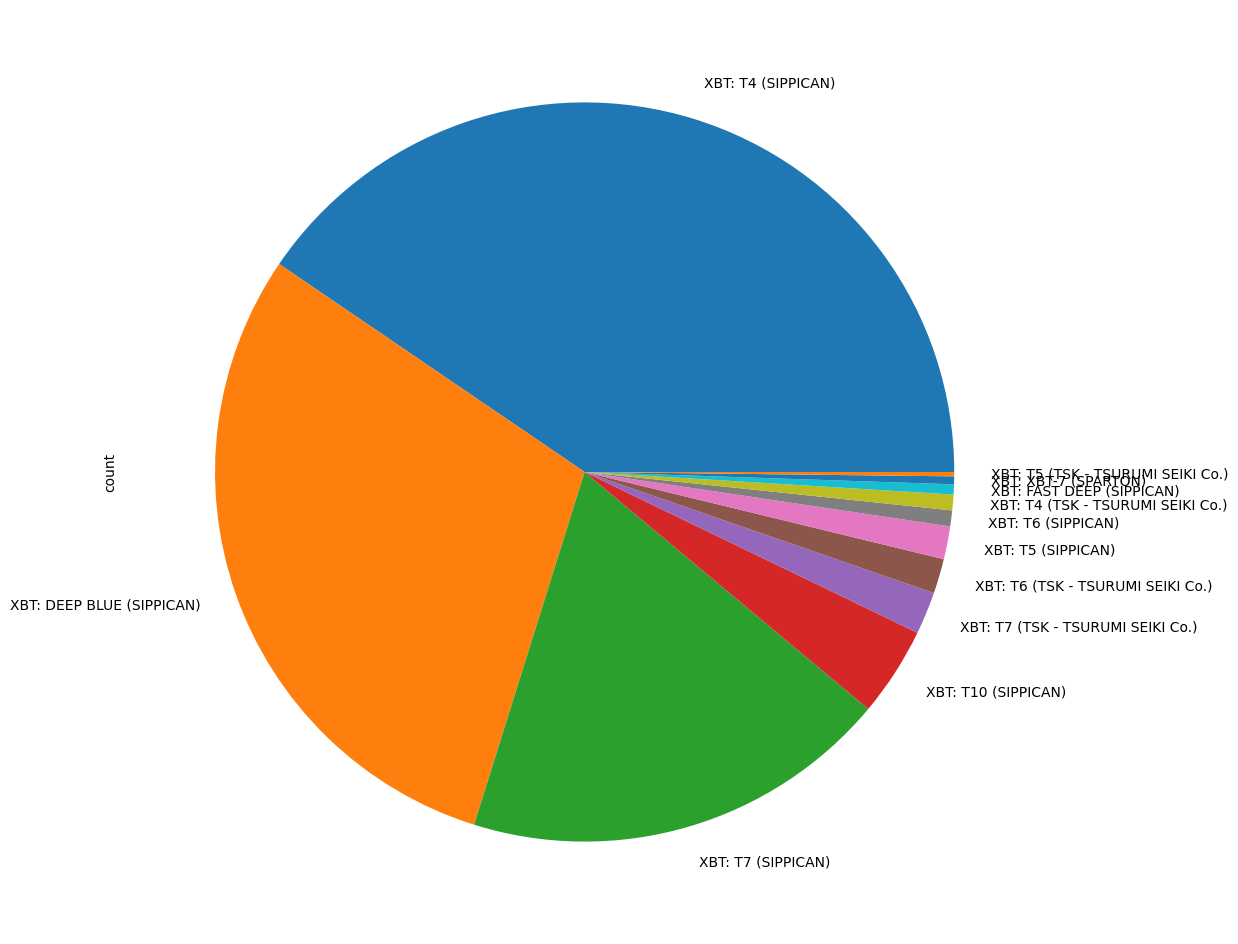

In [16]:
xbt_labelled['instrument'].value_counts().plot.pie(figsize=(12,12))

In [17]:
xbt_labelled.shape

(1119188, 17)

In [18]:
xbt_unlabelled.shape

(1034887, 17)

#### Splitting the data
Our starting assumption is that each observation is independant, so we will split this data into train and test sets randomly.

In fact, this likely to be false. For example, measurements made on the same voyage of a particular ship are likely to use the same instrument type (but not always). Also one needs to take care that the distriibution of classes is similar between the train and test set. Finding the right train/test split was a substantial part of the published paper, mentioned in the introduction. For now, the aim is  to learn about decision trees, so we will take the simple approach.

In [19]:
xbt_train, xbt_test = sklearn.model_selection.train_test_split(xbt_labelled)

#### Preparing the data
Now we normalise or encode the data as necessary. 

In [20]:
scaler_dict = {
    'year': sklearn.preprocessing.MinMaxScaler(),
    'max_depth': sklearn.preprocessing.MinMaxScaler(),
    'lat': sklearn.preprocessing.MinMaxScaler(),
    'lon': sklearn.preprocessing.MinMaxScaler(),
}
input_features = [list(scaler_dict.keys())]

preproc_input_features = []
for feature_name, scaler1 in scaler_dict.items():
    scaler1.fit(xbt_train[[feature_name]])
    preproc_input_features += [scaler1.transform(xbt_train[[feature_name]])]
    
X_train = numpy.concatenate( preproc_input_features, axis=1)



In [21]:
target_encoder = sklearn.preprocessing.LabelEncoder()
target_encoder.fit(xbt_train[target_feature])
y_train = target_encoder.transform(xbt_train[target_feature])

#### Set up the algorithms

We can get the hyperparameters for our decision tree by creating a decision tree object. You can get more explanation from `help(sklearn.tree.DecisionTreeClassifier`, or from the [scikit-learn docs](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier).

In [22]:
sklearn.tree.DecisionTreeClassifier().get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

In [77]:
%%time
dt_clf = sklearn.tree.DecisionTreeClassifier(
    max_depth=5, # reduce chance of overfitting
    min_samples_leaf= 2, #ensure that there won't be too small a number of samples in a leaf node
    min_samples_split= 5, # ensure more sample at a node when it splits
)


CPU times: user 76 µs, sys: 318 µs, total: 394 µs
Wall time: 412 µs


#### Fit classifier to the data

In [78]:
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=2, min_samples_split=5)

#### Visualise the classifier
One of the advantages of a decision tree is that it is relatively to interrogate the internals of the decision tree to understand how predictions are made. One can look at each decision node in the tree and see the choice of variable and threshold for each node. scikit learn provide a useful helper function to visualise the tree. In a tree of realisatic size, this becomes a very detailed diagram, so it is worth saving out the image (as is done here) and viewing in a separate image viewer so you can zoom in on the individual nodes.

https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html#sphx-glr-auto-examples-tree-plot-unveil-tree-structure-py

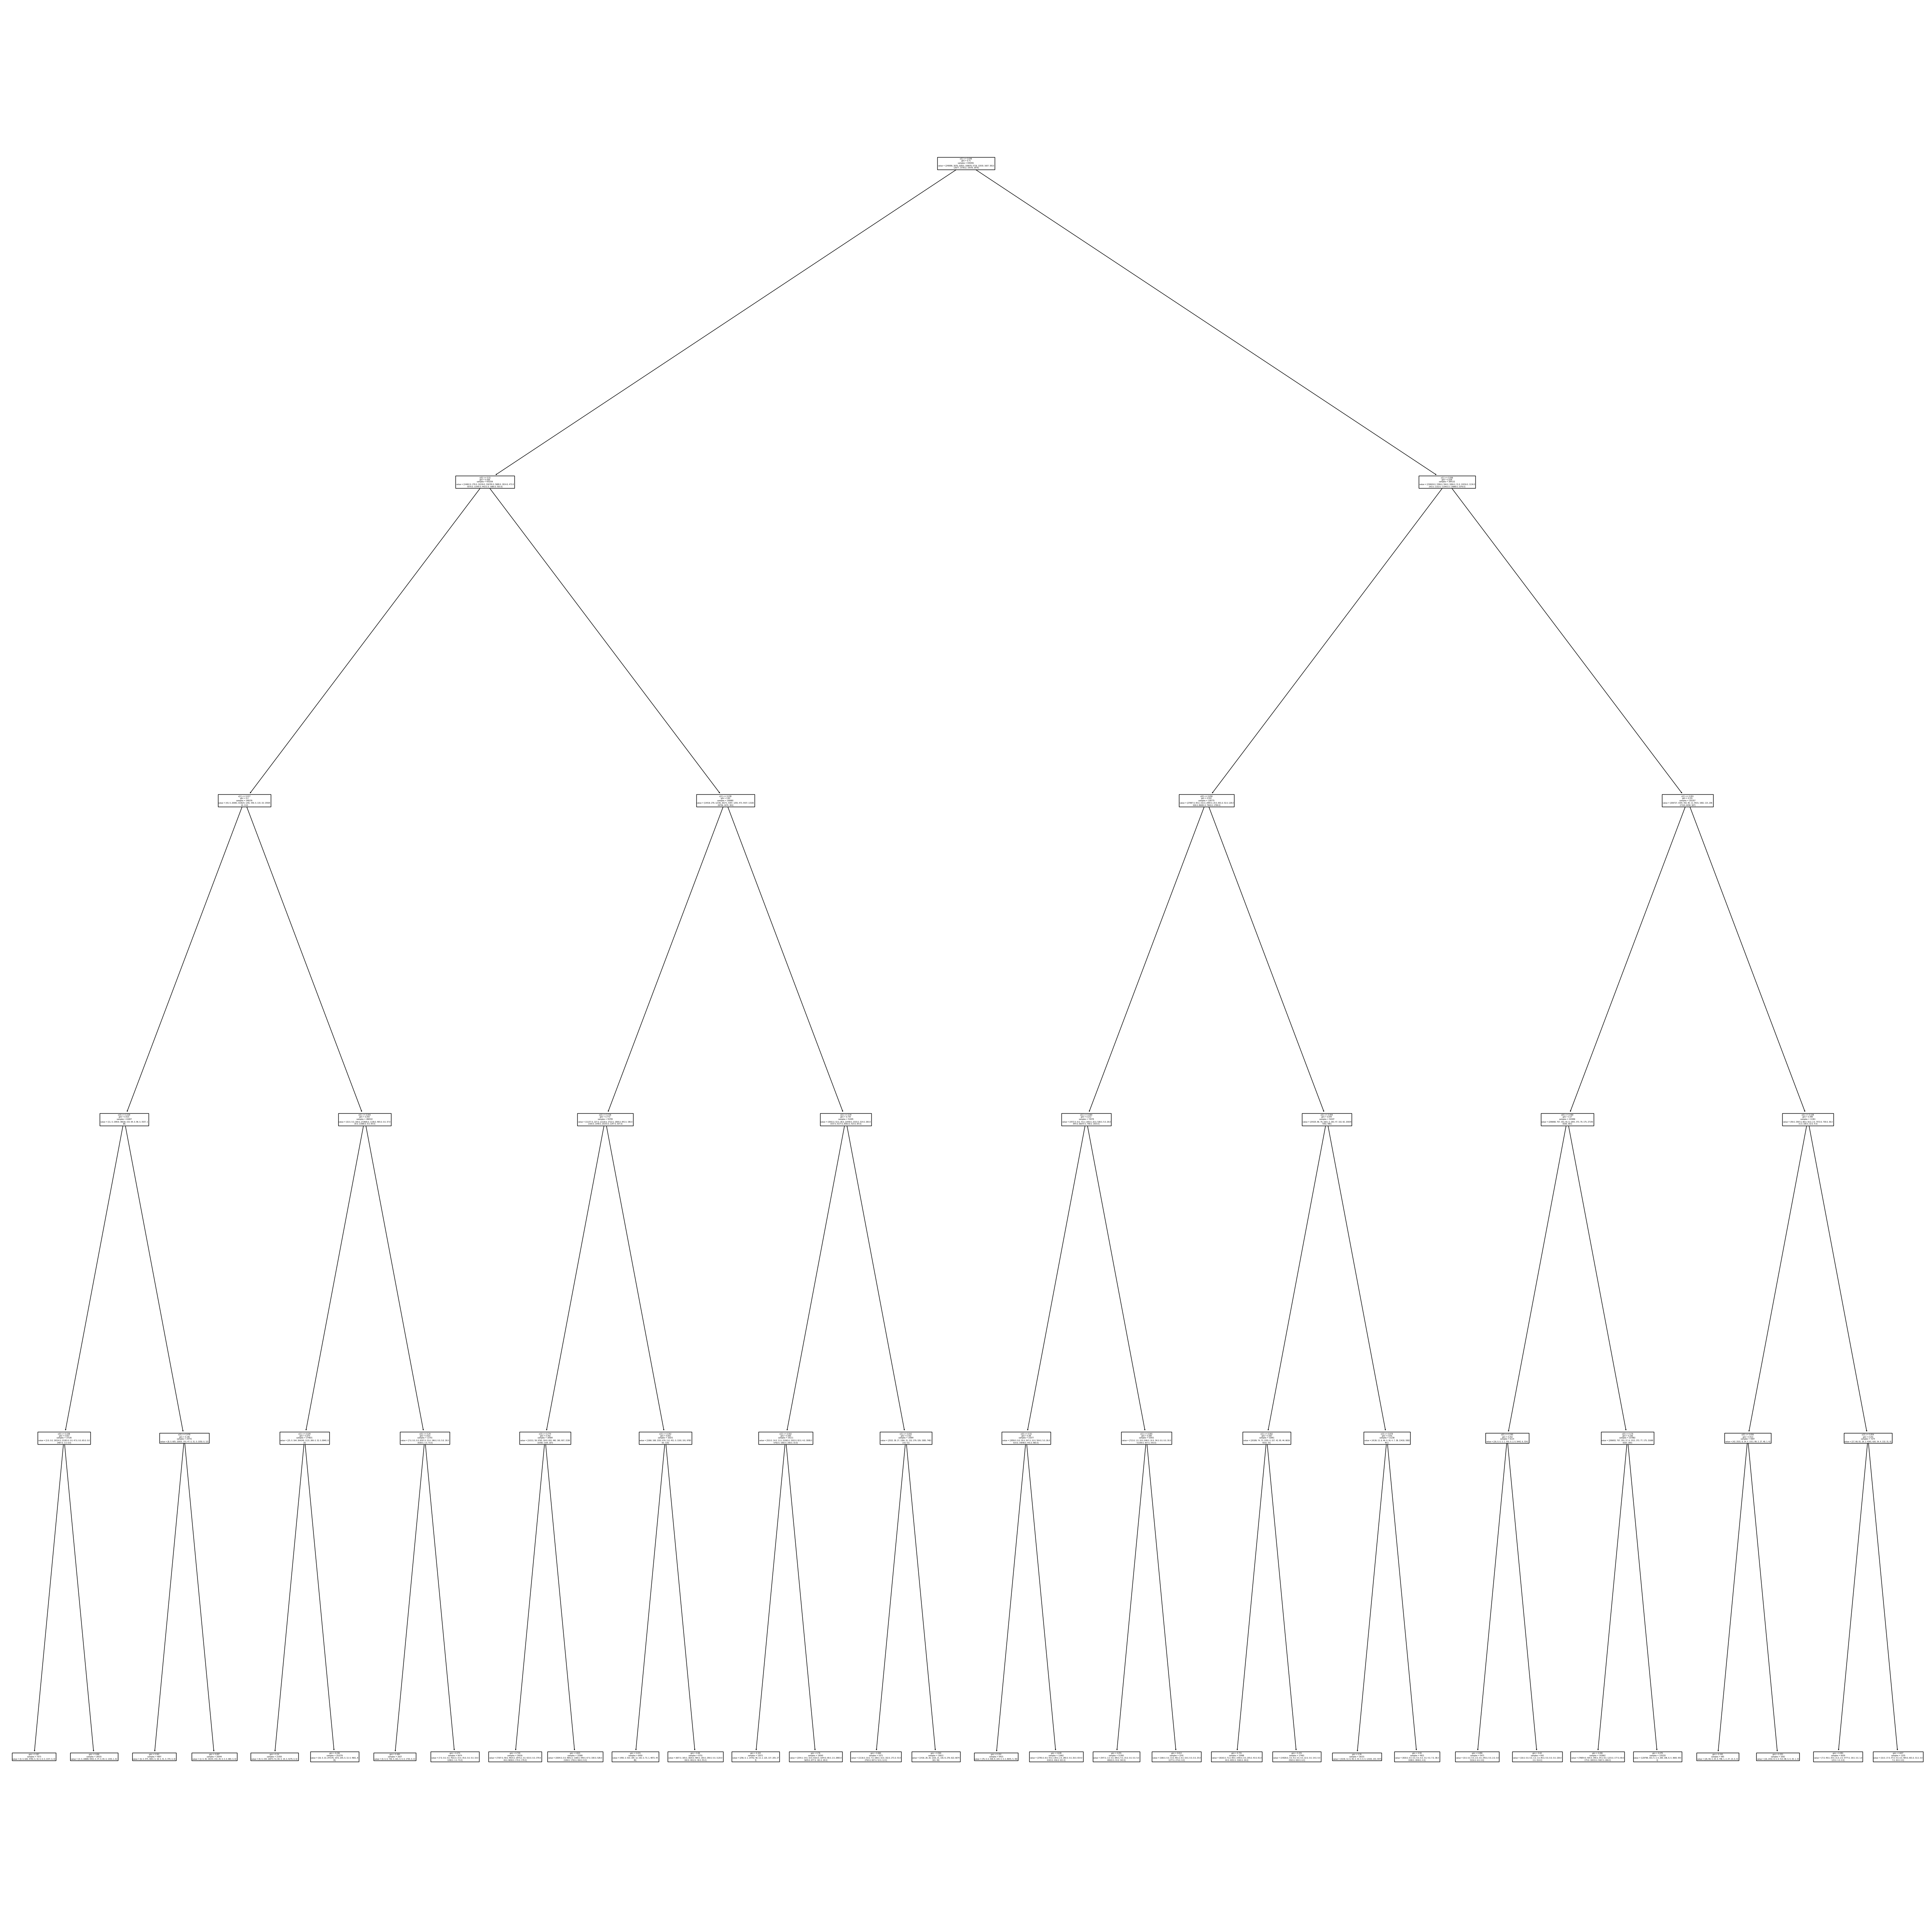

In [24]:
fig1 = matplotlib.pyplot.figure(figsize=(64,64))
_ = sklearn.tree.plot_tree(dt_clf)
matplotlib.pyplot.show()
fig1.savefig('treevis.svg',bbox_inches='tight')

### Random Forest - An ensemble of decision trees.

We can extend the decision tree concept further in a variety of ways. One of the most common is to use an ensemble of learners methods that combines multiple decision tree into what is called, unsurprisingly, a forest. In particular a common version is called *Random Forest*. The random in the title comes from the way trees in the forest differ from one another. Each tree ispresented with a randomly selected subset of the data
Here we define some of the hyperparameters for our random forest classifier

Further reading:
* [scikit learn class docs](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
* [Random forest tutorial - stackabuse](https://stackabuse.com/random-forest-algorithm-with-python-and-scikit-learn/)

Here we define the hyperparameters for our random forest. These are mostly the same as for the single decision tree. The one additional hyperparameter  is `n_estimators`, which refers to how many decision trees there will be in our random forest.

In [25]:
random_forest_hyperparameters = {
    'max_depth' : 5, # reduce chance of overfitting
    'min_samples_leaf' :  2, #ensure that there won't be too small a number of samples in a leaf node
    'min_samples_split' :  5, # ensure more sample at a node when it splits
    'n_estimators' : 20, # restrict number of trees in forest
}

In [26]:
%%time
rf_clf = sklearn.ensemble.RandomForestClassifier(
    **random_forest_hyperparameters
)
rf_clf.fit(X_train, y_train)

CPU times: user 16.3 s, sys: 133 ms, total: 16.5 s
Wall time: 16.5 s


RandomForestClassifier(max_depth=5, min_samples_leaf=2, min_samples_split=5,
                       n_estimators=20)

In [27]:
for p1,param_val in rf_clf.get_params().items():
    print(f'param value {p1}={param_val}')

param value bootstrap=True
param value ccp_alpha=0.0
param value class_weight=None
param value criterion=gini
param value max_depth=5
param value max_features=sqrt
param value max_leaf_nodes=None
param value max_samples=None
param value min_impurity_decrease=0.0
param value min_samples_leaf=2
param value min_samples_split=5
param value min_weight_fraction_leaf=0.0
param value monotonic_cst=None
param value n_estimators=20
param value n_jobs=None
param value oob_score=False
param value random_state=None
param value verbose=0
param value warm_start=False


We can see all the individual trees in our forest. Although we can interrogate all the trees and see the decision threshold, the additional layer of combining the outputs does make it more difficult to explain a prediction from a random forest compared to a decision tree. This is comprimise we might wish to make for the increased predictive power of a random forest.

In [28]:
rf_clf.estimators_

[DecisionTreeClassifier(max_depth=5, max_features='sqrt', min_samples_leaf=2,
                        min_samples_split=5, random_state=219723559),
 DecisionTreeClassifier(max_depth=5, max_features='sqrt', min_samples_leaf=2,
                        min_samples_split=5, random_state=1161233978),
 DecisionTreeClassifier(max_depth=5, max_features='sqrt', min_samples_leaf=2,
                        min_samples_split=5, random_state=2037692792),
 DecisionTreeClassifier(max_depth=5, max_features='sqrt', min_samples_leaf=2,
                        min_samples_split=5, random_state=1672756463),
 DecisionTreeClassifier(max_depth=5, max_features='sqrt', min_samples_leaf=2,
                        min_samples_split=5, random_state=2059754235),
 DecisionTreeClassifier(max_depth=5, max_features='sqrt', min_samples_leaf=2,
                        min_samples_split=5, random_state=2073587174),
 DecisionTreeClassifier(max_depth=5, max_features='sqrt', min_samples_leaf=2,
                        min_s

In [29]:
X_test = numpy.concatenate(
    [scaler1.transform(xbt_test[[feature_name]]) for feature_name, scaler1 in scaler_dict.items()],
    axis=1)
y_test = target_encoder.transform(xbt_test[target_feature])

One benfit on an ensemble of classifiers is we can get a pseudo-probability for our prediction, which gives a basic way of evluating the confidence of the prediction.

In [30]:
rf_clf.predict_proba(X_test)

array([[1.64367688e-01, 1.23836929e-02, 1.62666510e-01, ...,
        4.69288637e-01, 1.04798787e-02, 5.78279876e-03],
       [3.79487533e-04, 2.60933097e-06, 7.16222243e-03, ...,
        8.09061888e-02, 2.40533716e-05, 2.56043406e-04],
       [3.26541480e-01, 5.01464669e-03, 1.21883264e-01, ...,
        3.10236958e-01, 1.73418086e-02, 4.66138445e-03],
       ...,
       [2.67679647e-01, 3.57694231e-03, 1.54176239e-01, ...,
        3.64715473e-01, 1.99266868e-02, 5.55275304e-03],
       [1.09149572e-03, 3.52580292e-05, 8.58290579e-04, ...,
        2.73720194e-02, 9.57302405e-05, 1.72369073e-04],
       [1.72533497e-03, 9.29810622e-05, 4.59695293e-03, ...,
        1.01393065e-01, 8.68330560e-05, 1.19027463e-03]])

In [31]:
y_pred_dt = dt_clf.predict(X_test)
y_pred_rf = rf_clf.predict(X_test)

<Axes: title={'center': 'frequency of different labels for random forest predictions.'}, ylabel='count'>

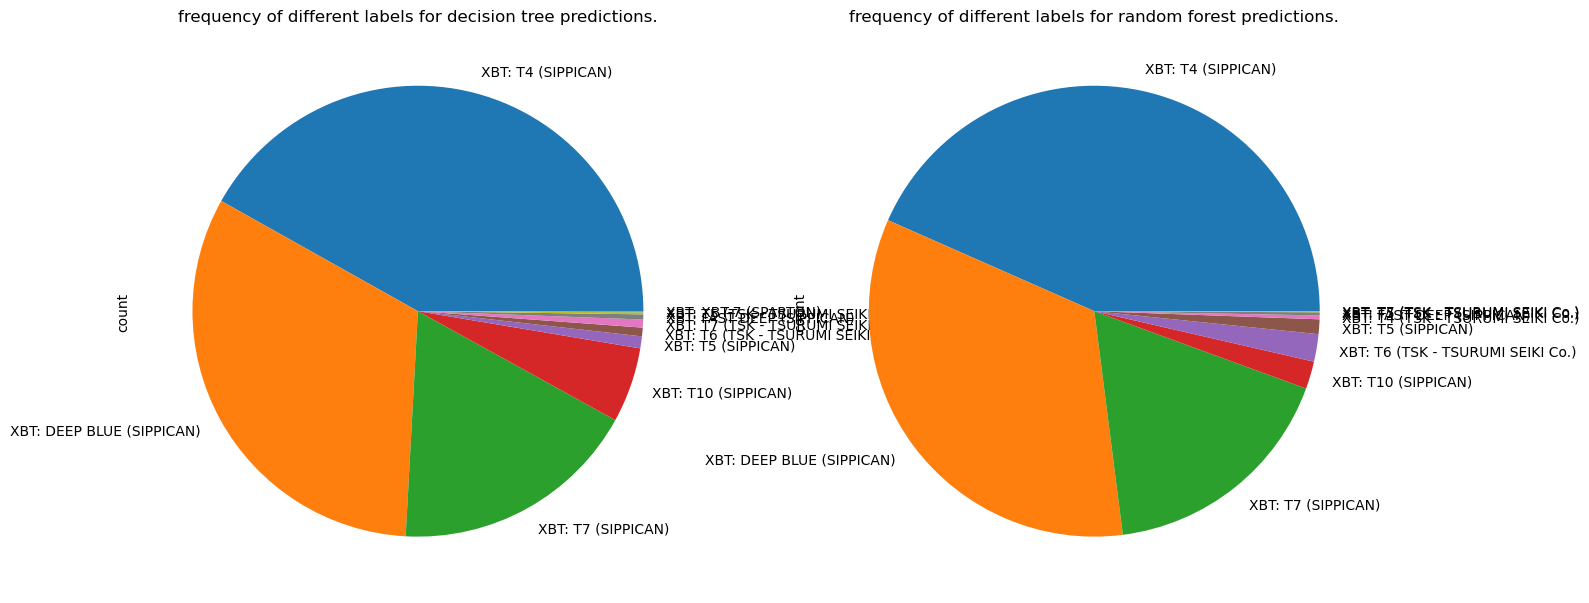

In [32]:
fig1 = matplotlib.pyplot.figure(figsize=(16,8))
ax1 = fig1.add_subplot(1,2,1, title='frequency of different labels for decision tree predictions.')
pandas.Series(target_encoder.inverse_transform(y_pred_dt)).value_counts().plot.pie(ax=ax1)
ax1 = fig1.add_subplot(1,2,2, title='frequency of different labels for random forest predictions.')
pandas.Series(target_encoder.inverse_transform(y_pred_rf)).value_counts().plot.pie(ax=ax1)
                       

In [33]:
len(list(target_encoder.classes_)), len(list(sklearn.metrics.precision_score(y_test, y_pred_dt, average=None)))

/Users/stephen.haddad/opt/anaconda3/envs/ml_weather_tutorial_tf_update/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


(12, 12)

In [34]:
xbt_train['instrument'].unique().shape

(12,)

In [35]:
prec_dt, recall_dt, f1_dt, support_dt = sklearn.metrics.precision_recall_fscore_support(y_test, y_pred_dt, average=None)
prec_rf, recall_rf, f1_rf, support_rf = sklearn.metrics.precision_recall_fscore_support(y_test, y_pred_rf, average=None)
metrics_xbt = pandas.DataFrame({
    'classes': list(target_encoder.classes_),
    'precision_dt': list(prec_dt),
    'precision_rf': list(prec_rf),
    'recall_dt': list(recall_dt),
    'recall_rf': list(recall_rf),
    'f1_dt': list(f1_dt),
    'f1_rf': list(f1_rf),
    'support_dt': list(support_dt),
    'support_rf': list(support_rf),  
})

/Users/stephen.haddad/opt/anaconda3/envs/ml_weather_tutorial_tf_update/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/stephen.haddad/opt/anaconda3/envs/ml_weather_tutorial_tf_update/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


The following plots compare the performnce, measure by the precision and recall metrics for each class for a decision tree compared to a random forest.

<Axes: xlabel='classes'>

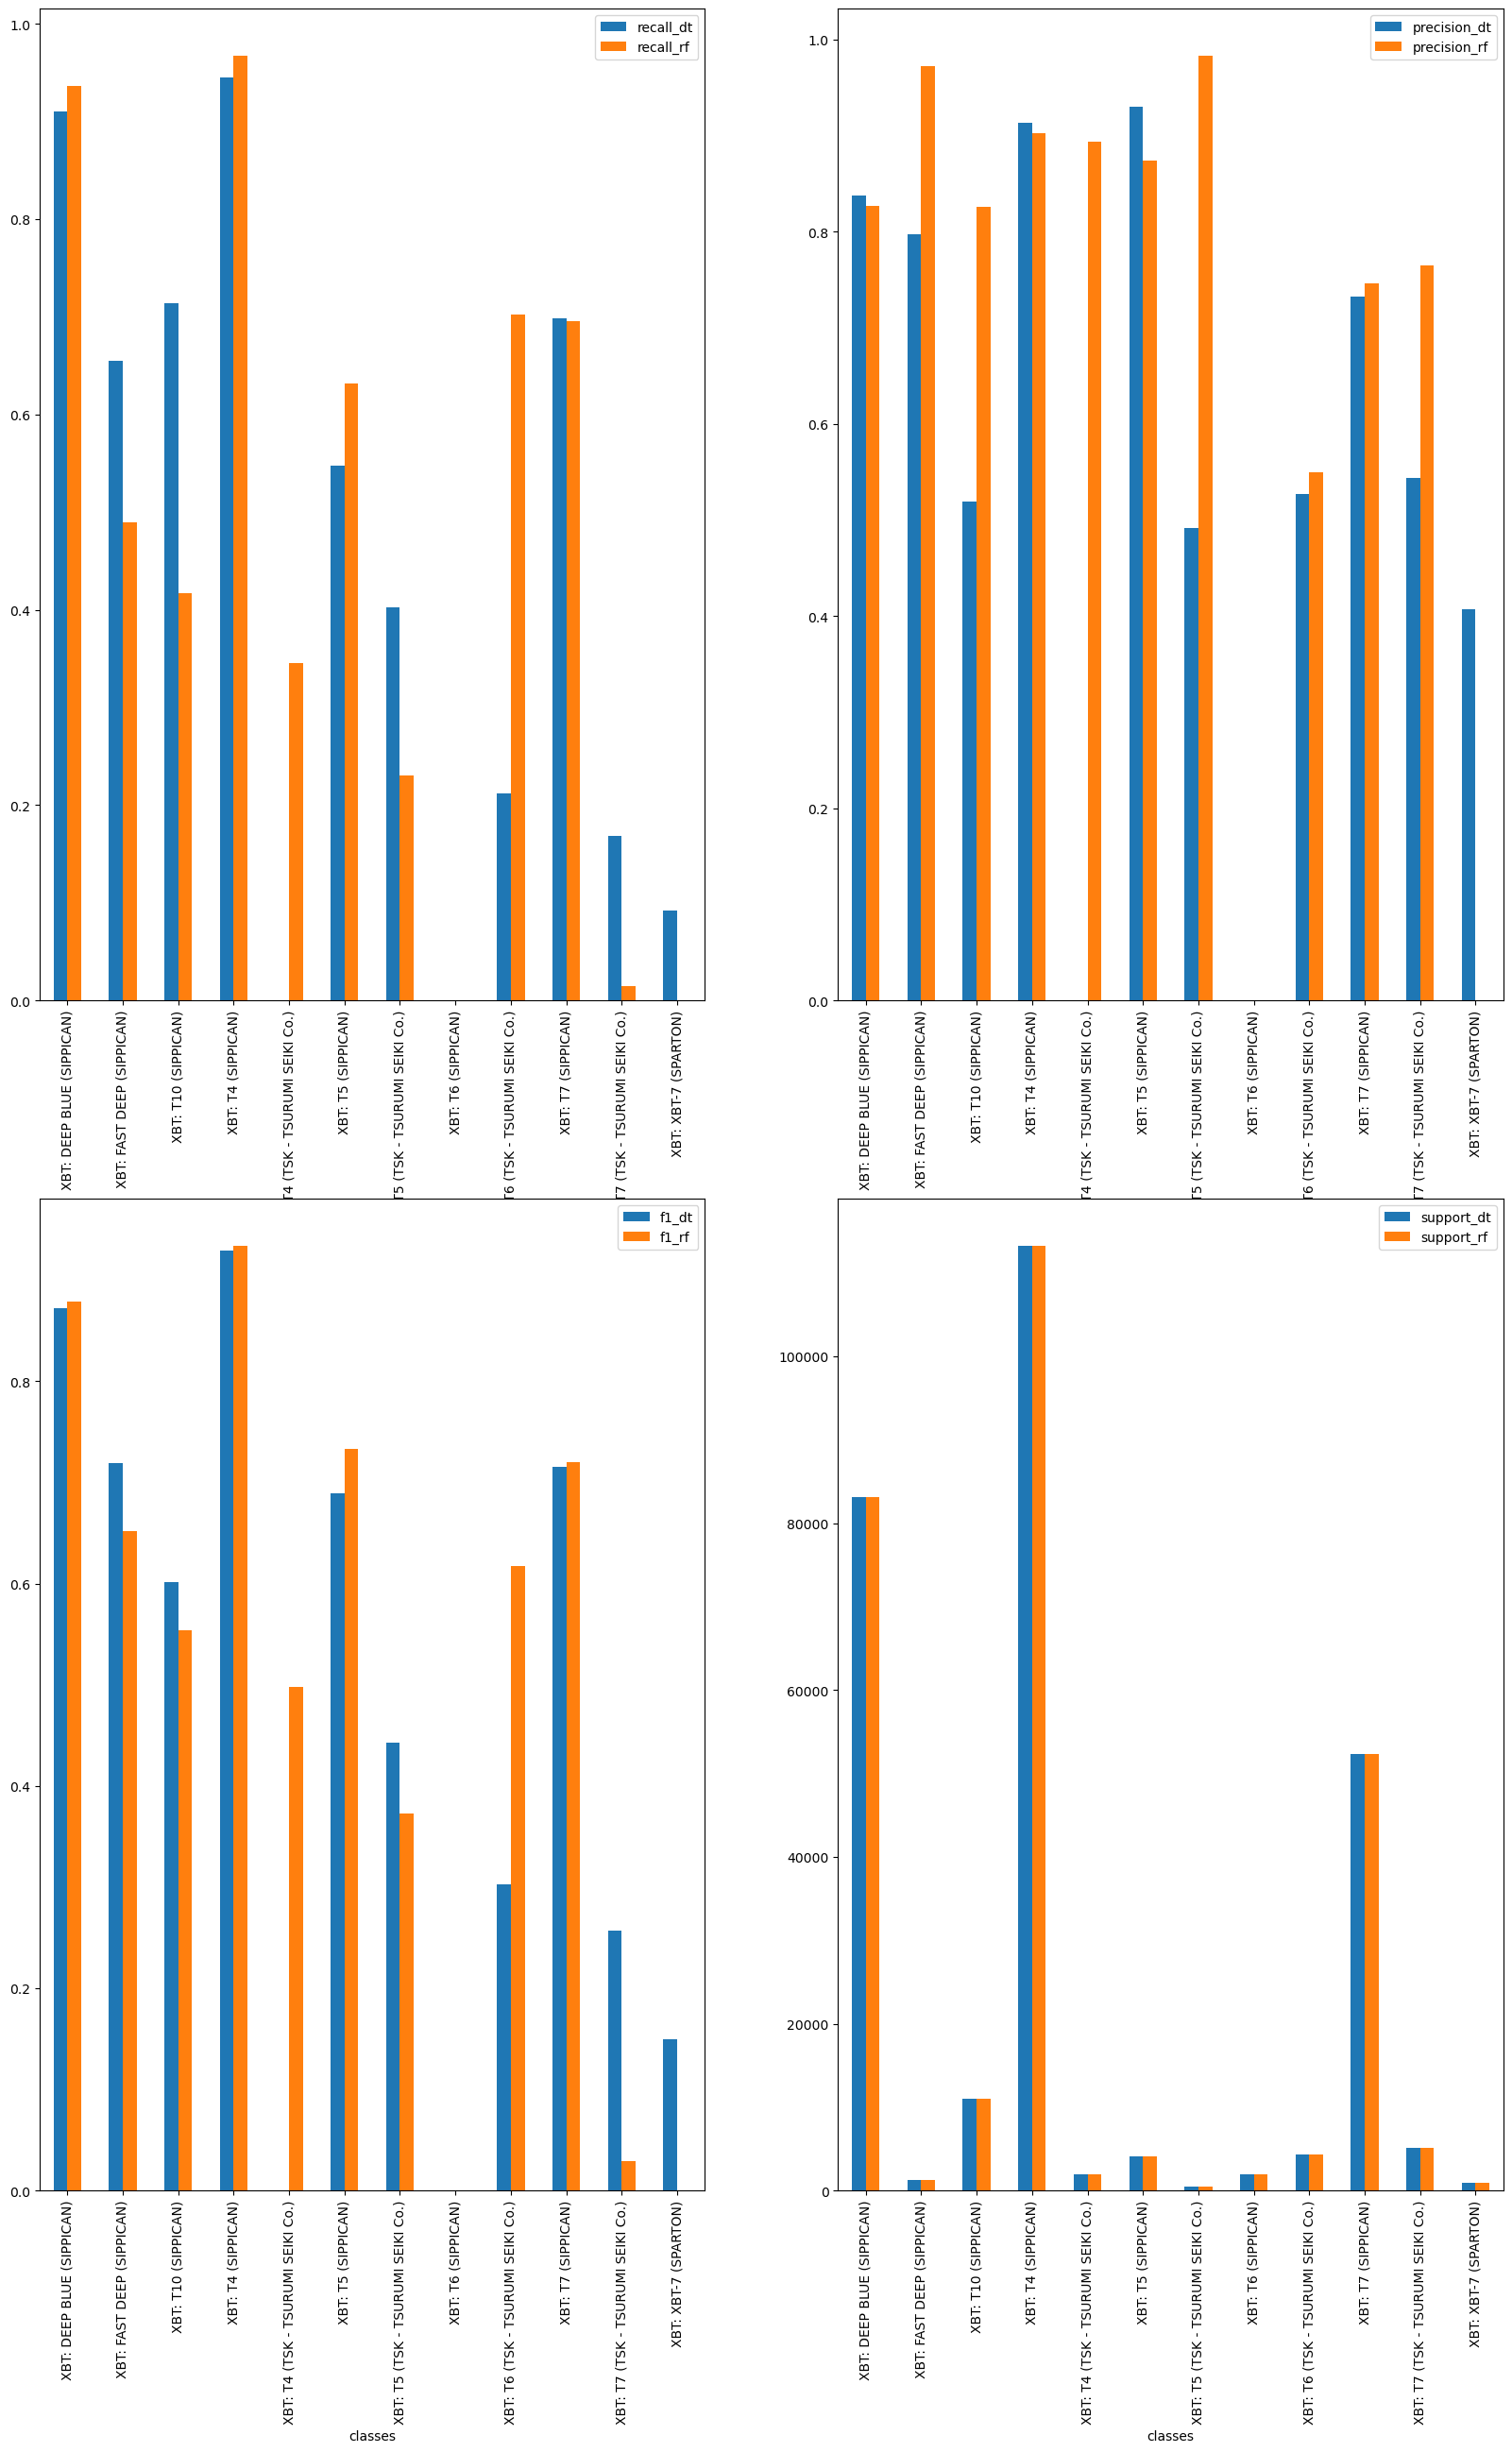

In [36]:
fig1 = matplotlib.pyplot.figure(figsize=(20,30))
ax1 = fig1.add_subplot(2,2,1)
metrics_xbt.plot.bar(x='classes',y=['recall_dt','recall_rf'],ax=ax1)
ax1 = fig1.add_subplot(2,2,2)
metrics_xbt.plot.bar(x='classes',y=['precision_dt','precision_rf'],ax=ax1)
ax1 = fig1.add_subplot(2,2,3)
metrics_xbt.plot.bar(x='classes',y=['f1_dt','f1_rf'],ax=ax1)
ax1 = fig1.add_subplot(2,2,4)
metrics_xbt.plot.bar(x='classes',y=['support_dt','support_rf'],ax=ax1)


## Tutorial - Neural Networks

A lot of the staggering advancement in recent years in applying machine learning to complex real-world situations has come from the use of large neural networks, often referred to as "deep learning" for reasons that will become apparent in this tutorial. To start with lets consider the building block of the neural network: a single "neuron". As the name suggests, this concept in inspired by a biological neuron found in many brains, specifically human brains. I won't elaborate on the similarities and differences here, but will say that artificial neurons do not work like biological neurons, though there continues to interesting cross-pollination of ideas between study of artificial and biological neurons and how networks of them learn.

A single artificial neuron (hereafter just referred to as a neuron), is essentially a linear weighted sum of inputs plus a constant term, to which a threshold operation is applied to the result, so that the output is 1 (activated) or 0 (not activated). The cell is known as a *perceptron*. The perceptron can be trained by iteratively updating the weights so that the error in the output on data, for example training data is reduced and minimised. This is usually done through a process called *gradient descent*. A perceptron can be updated to output a range between 0 and 1, rather than binary 0 or 1 output, using a Sigmoid function rather than a threshold operation. This results in what is known as a *sigmoid neuron*.

Neural networks are a series of these neurons joined together in a network of layers. Initially the computational cost of updating the weights for more than a few neurons was prohibitive. As computers became more powerful, more neurons were used, with more *layers*. A layer is where the input of one set of neurons becomes the input for a subsequent neurons. How neurons are connected together is what determines *network architecture*. Initially There was one layer into which inputs where feed, then the outputs all went to 1 neuron to produce a single output. Subsequently layers were added in between which directly connected to neither input nor output, which are termed hidden layers. A simple feed-forward fully connected network is usually visualised as follows (from wikipedia):
![A feedforward network with 1 hidden layer](images/Colored_neural_network.svg)

The way gradient descent works is to calculate the change in the loss or cost function as you change each weight in turn. As the network grows and the number of weights grows with it, this quickly becomes expensive, and  numerical issues arise with training the weights to produce a good result. Training is now done through a technique called "back-propagation", which efficiently calculates the gradients in the the weights one layer at a time, and uses the the previously calculated gradients for each layer moving backwards to calculate the gradient for the next (hence the name back-propagation where the gradients being calculated propagate backwards like a wave.
Further optimisations have been introduced as networks have grown, such stochastic gradient descent where subsets of training data are used in *batches* to update the weights. The mathematics around this quickly becomes very complex, so consult the references for more on the mathematical details, which are very interesting!

Key terms in a neural network (NN)
* Neuron - a computing unit consisting of a weighted combination of inputs, loosely mimicing a biological neuron found in animal brains. 
* Perceptron - A specific neuron with a linear weighted sum of inputs plus an activation threshold. The term is used somewhat loosely/ambiguously at times in machine learning literature, so be careful to check what exactly the author means if the implementation details are likely to be important for a specific problem.
* Activation - Where the output from a perceptron is zero or non-zero.
* Weights - The co-efficient applied to each input to the neuron.
* Bias - the constant term
* Sigmoid function - A non-linear function applied to the linear weighted sum to ensure the output is in the range 0 to 1.

Key terms in training a NN
* Gradient descent - The process of updating the weights of a neural network, based on the partial derivatives of the cost function with respect to each of the weights in the network, updating the weights "towards" the direction of steepest descent of the cost function.
* back propagation - the process of more efficiently calculating the cost function gradients for a network by calculating one layer at a time, and saving total computation in this way.
* mini batch - In gradient descent, when training using stochastic gradient descent, a mini-batch is the subset of input data for which weight gradient are calculated together.
* epoch - Several batches of processing of updating weights, which cumulatively cover the whole input dataset.
* cost function - the different between the ground truth the network is trying to predict and the actual predictions made by the network.
* local optimum - a place in the cost function where minor changes to parameters will only increase the cost function.
* Learning rate - The scaling factor of the movement "down the slope" during gradient descent. The larger the learning rate the faster the movement of weights towards an optimum, but the greater the change of finding a local optimum.
* vanishing gradients - When using activation functions such as a sigmoid,, which has values between 0 and 1, you can land up with very small gradients being used in back propogation, essentially limiting the ability to update the weights of the network. Various choices in activations and training algorithim (e.g. batch size) can help. Additional one can use *skip conections*, where non adjacent layers are connected, so that larger values are maintained through the network. These are known as *residual networks*.
  * Further reading: [Wikipedia - Vanishing Gradient Problem](https://en.wikipedia.org/wiki/Vanishing_gradient_problem)
* exploding gradients: Opposite to the vanishing gradient problem, if one chooses activation functions where the function or its derivatives can take on larger values than in the 0 to 1 range, gradients can multiply and explode, especially in very deep recurrent networks. 
  * Further reading: [A Gentle Introduction to Exploding Gradients](https://machinelearningmastery.com/exploding-gradients-in-neural-networks/)


Hyperparameters
* learning rate (see above)
* batch size - the input of input points used for calculate a batch of gradients in stochastic gradient descent.
* solver - The variant of gradient descent with back propagation used for training
* maximum iterations - The total number of training loops (usually epochs) before terminating (if another stopping condition is not reached).
 
Types of NN
* feed forward - where predictions move forward through the network from input to output
* Convolutional Neural Network - Where some weights are shared, in the form of convolutional kernels (like image processing). The network learns these kernels along with other weights.
* Recurrent Neural Network - A network where some outputs feedback as input to previous layers. With careful arrangement, this allows the network to have a "memory" of previous input. This is used to learn data in a series or sequence, e.g. a time series variable or the words in a sentence.
* Graphical Neural Network - A neural network structured around a graph representation of data.
 

## Example 2 - Precipitation Rediagnosis

In this example we want to train a ML model to predict **precipitation** in a grid cells based on the state of the corresponding 1D column of the atmosphere. We can start by using a simple feed-forward neural network. But in this architecture, all inputs are considered together, not considering the spatial properties of the data. We know this is important, so we could rather an architecture that makes use of the knowledge that adjacent data points are important. An example is a **convolutional neural network** (CNN). 

In a CNN, weight are applied through a convolution operation with the a weights kernel that is learnt in training. This means that only nearby data is combined towards the results. Additionally there is 1 kernel for the whole column, so there are fewer weights to learn compared to a fully connected NN, so computation is faster and saved model is smaller.

Further reading
* [Github Repository](https://github.com/informatics-lab/precip_rediagnosis)

#### Setup
For this example, we will be using neural networks. The scikit-learn implementation is quite simple, only providing feed-forward fully-connected architecture. To use the more advanced architectures required for this sort of problem, we need a more deep learning focused library. Most commonly used are [Tensorflow](https://www.tensorflow.org/), [Keras](https://keras.io/) and [Pytorch](https://pytorch.org/).

For this example, we will use the Keras v2 API, with a Tensorflow backend.

In [37]:
import tensorflow 
import keras
import tensorflow.keras
import tensorflow.keras.layers 
import tensorflow.keras.models 
import code

2024-04-09 10:03:17.825646: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [38]:
import sklearn.metrics

#### Load Data
This dataset has been prepared from gridded model output data and gridded radar observation data into a tabular dataset, where each row in the dataframe represents the state of the atmosphere in a column at one gridpoint at a particular time. The dataset covers the UK, as that is where high-quality radar data was easily available. The model data comes from the MOGREPS-G ensemble, so for gridpoint and time, there are 18 rows, representing each of the realisation / ensemble memebers. The model data will be the input to the model. The target is predict the observed rainfall, where the radar observations of rainfall (which are known to be imperfect) are taken as our best estimate of "truth". As there are many radar grid points for each model grid point, we need to process this data in some way. In this example we will simply take the mean across the cell, which of course means we are throwing away a lot of information. A more sophisticated approach may do something like instead using fractions of the grid cell where precipitation above a certain level was measured as the target, which was done in the actual project (see github repo for more info).

In [39]:
try:
    prd_data_dir = pathlib.Path(os.environ['ML_TUTORIAL_DIR']) / 'prd'
except KeyError:
    prd_data_dir = pathlib.Path('/project/informatics_lab/data_science_cop/ml_tutorial/prd')
print(prd_data_dir.is_dir())
prd_data_dir

True


PosixPath('/Users/stephen.haddad/data/ml_weather_tutorial/prd')

In [40]:
prd_prefix_str = 'prd_merged'
prd_csv_suffix = 'csv'

In [41]:
target_parameter = 'radar_mean_rain_instant'
profile_features = ['air_temperature', 'relative_humidity']
single_lvl_features = ['air_pressure_at_sea_level'] 

In [42]:
prd_path_list = [p1 for p1 in prd_data_dir.rglob(f'{prd_prefix_str}*{prd_csv_suffix}')]
prd_path_list

[PosixPath('/Users/stephen.haddad/data/ml_weather_tutorial/prd/202008_storm_ellen/prd_merged_20200819T0600Z_20200822T1200Z.csv'),
 PosixPath('/Users/stephen.haddad/data/ml_weather_tutorial/prd/202002_storm_dennis/prd_merged_20200214T1800Z_20200217T1800Z.csv'),
 PosixPath('/Users/stephen.haddad/data/ml_weather_tutorial/prd/202002_storm_ciara/prd_merged_20200207T1800Z_20200210T1800Z.csv')]

In [43]:
prd_train_df = pandas.concat([pandas.read_csv(p1) for p1 in prd_path_list[:2]])

In [44]:
prd_train_df

,realization,latitude,longitude,forecast_period,forecast_reference_time,time,cloud_area_fraction,surface_altitude,air_pressure_at_sea_level,rainfall_rate,...,radar_fraction_in_band_aggregate_3hr_0.0,radar_fraction_in_band_aggregate_3hr_0.25,radar_fraction_in_band_aggregate_3hr_2.5,radar_fraction_in_band_aggregate_3hr_7.0,radar_fraction_in_band_aggregate_3hr_10.0,radar_fraction_in_band_instant_0.0,radar_fraction_in_band_instant_0.25,radar_fraction_in_band_instant_2.5,radar_fraction_in_band_instant_7.0,radar_fraction_in_band_instant_10.0
0,0,49.40625,-5.484375,0 days 06:00:00,2020-08-19,2020-08-19 06:00:00,1.000000,0.0,99658.0,0.013411,...,1.0,0.0,0.0,0.0,0.0,0.964706,0.035294,0.0,0.0,0.0
1,1,49.40625,-5.484375,0 days 06:00:00,2020-08-19,2020-08-19 06:00:00,1.000000,0.0,99762.0,0.000000,...,1.0,0.0,0.0,0.0,0.0,0.964706,0.035294,0.0,0.0,0.0
2,2,49.40625,-5.484375,0 days 06:00:00,2020-08-19,2020-08-19 06:00:00,0.968750,0.0,99717.0,0.013411,...,1.0,0.0,0.0,0.0,0.0,0.964706,0.035294,0.0,0.0,0.0
3,3,49.40625,-5.484375,0 days 06:00:00,2020-08-19,2020-08-19 06:00:00,1.000000,0.0,99538.0,0.013411,...,1.0,0.0,0.0,0.0,0.0,0.964706,0.035294,0.0,0.0,0.0
4,4,49.40625,-5.484375,0 days 06:00:00,2020-08-19,2020-08-19 06:00:00,1.000000,0.0,99581.0,0.301748,...,1.0,0.0,0.0,0.0,0.0,0.964706,0.035294,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347251,13,58.78125,1.546875,0 days 06:00:00,2020-02-17 12:00:00,2020-02-17 18:00:00,0.953125,0.0,98756.0,0.000000,...,1.0,0.0,0.0,0.0,0.0,1.000000,0.000000,0.0,0.0,0.0
347252,14,58.78125,1.546875,0 days 06:00:00,2020-02-17 12:00:00,2020-02-17 18:00:00,0.968750,0.0,98725.0,0.000000,...,1.0,0.0,0.0,0.0,0.0,1.000000,0.000000,0.0,0.0,0.0
347253,15,58.78125,1.546875,0 days 06:00:00,2020-02-17 12:00:00,2020-02-17 18:00:00,1.000000,0.0,98737.0,0.000000,...,1.0,0.0,0.0,0.0,0.0,1.000000,0.000000,0.0,0.0,0.0
347254,16,58.78125,1.546875,0 days 06:00:00,2020-02-17 12:00:00,2020-02-17 18:00:00,0.984375,0.0,98752.0,0.000000,...,1.0,0.0,0.0,0.0,0.0,1.000000,0.000000,0.0,0.0,0.0


### Data cleaning and preprocessing

Next we need to prepare the data for use in the ML model. We will take steps including:
* removing bad values
* scaling data to have zero mean and standard deviation of 1.

In [45]:
# drop NaN values in the dataset
prd_train_df = prd_train_df.dropna()

# drop data points with zero precip in the radar data
prd_train_df = prd_train_df[prd_train_df[target_parameter]>0]

Filter out the most extreme values to make this task a bit simpler. How might we might the pipeline different to be able to forecast extremes?

In [46]:
print(prd_train_df.shape)
prd_train_df = prd_train_df[prd_train_df[target_parameter] <20 ]
print(prd_train_df.shape)

(301266, 232)
(301248, 232)


In [47]:
# Get a list of columns names for profile features
prd_prof_feature_columns = [s for s in prd_train_df.columns for vars in profile_features if s.startswith(vars)]

prd_features = prd_train_df[prd_prof_feature_columns + single_lvl_features]

prd_target = prd_train_df[[target_parameter]]


In [48]:
prd_features.describe().T

,count,mean,std,min,25%,50%,75%,max
relative_humidity_5.0,301248.0,0.861277,0.104536,0.410156,0.799805,0.883789,0.939453,1.048828
relative_humidity_10.0,301248.0,0.861277,0.104536,0.410156,0.799805,0.883789,0.939453,1.048828
relative_humidity_20.0,301248.0,0.861302,0.104548,0.410156,0.799805,0.884766,0.939453,1.048828
relative_humidity_30.0,301248.0,0.862214,0.105524,0.406250,0.799805,0.885742,0.941406,1.047852
relative_humidity_50.0,301248.0,0.864039,0.107755,0.396484,0.799805,0.887695,0.945312,1.050781
...,...,...,...,...,...,...,...,...
air_temperature_4500.0,301248.0,259.451171,7.825167,236.562500,255.875000,260.750000,265.000000,274.500000
air_temperature_5000.0,301248.0,256.359631,8.147368,232.562500,252.875000,257.625000,262.000000,271.125000
air_temperature_5500.0,301248.0,253.169075,8.432298,229.250000,249.687500,254.437500,258.875000,267.875000
air_temperature_6000.0,301248.0,249.866769,8.643350,226.812500,246.250000,251.000000,255.687500,265.062500


In [49]:
standardScaler = sklearn.preprocessing.StandardScaler()

prd_features = pandas.DataFrame(standardScaler.fit_transform(prd_features), 
                                columns=prd_features.columns,
                                index=prd_features.index)
prd_features.describe().T

,count,mean,std,min,25%,50%,75%,max
relative_humidity_5.0,301248.0,1.077815e-15,1.000002,-4.315475,-0.588053,0.215351,0.747839,1.794133
relative_humidity_10.0,301248.0,1.077815e-15,1.000002,-4.315475,-0.588053,0.215351,0.747839,1.794133
relative_humidity_20.0,301248.0,-6.158943e-16,1.000002,-4.315213,-0.588218,0.224435,0.747522,1.793696
relative_humidity_30.0,301248.0,-1.696728e-15,1.000002,-4.320973,-0.591427,0.222965,0.750469,1.759205
relative_humidity_50.0,301248.0,-1.437087e-15,1.000002,-4.339062,-0.596115,0.219540,0.754247,1.733031
...,...,...,...,...,...,...,...,...
air_temperature_4500.0,301248.0,1.914103e-15,1.000002,-2.925012,-0.457010,0.165981,0.709101,1.923135
air_temperature_5000.0,301248.0,3.622908e-16,1.000002,-2.920842,-0.427701,0.155310,0.692295,1.812290
air_temperature_5500.0,301248.0,1.618232e-15,1.000002,-2.836607,-0.412886,0.150425,0.676676,1.744003
air_temperature_6000.0,301248.0,1.449163e-15,1.000002,-2.667288,-0.418446,0.131110,0.673436,1.758086


In [50]:
prd_processed_data = pandas.concat([prd_features, prd_target], axis=1, sort=False)
prd_processed_data

,relative_humidity_5.0,relative_humidity_10.0,relative_humidity_20.0,relative_humidity_30.0,relative_humidity_50.0,relative_humidity_75.0,relative_humidity_100.0,relative_humidity_150.0,relative_humidity_200.0,relative_humidity_250.0,...,air_temperature_3250.0,air_temperature_3500.0,air_temperature_3750.0,air_temperature_4000.0,air_temperature_4500.0,air_temperature_5000.0,air_temperature_5500.0,air_temperature_6000.0,air_pressure_at_sea_level,radar_mean_rain_instant
0,1.373748,1.373748,1.373358,1.389027,1.415833,1.444880,1.479073,1.441536,1.392916,1.337451,...,1.473964,1.432045,1.416924,1.445619,1.539756,1.589825,1.573527,1.526694,0.104956,0.001103
1,1.242961,1.242961,1.242586,1.259465,1.279890,1.266382,1.259381,1.276511,1.271441,1.259209,...,1.392378,1.378955,1.416924,1.412048,1.380015,1.505442,1.506819,1.497770,0.192607,0.001103
2,1.308355,1.308355,1.307972,1.342754,1.397707,1.400256,1.382409,1.406795,1.375563,1.320064,...,1.519289,1.547075,1.511749,1.470797,1.427937,1.513113,1.506819,1.410998,0.154681,0.001103
3,1.280329,1.280329,1.279950,1.296482,1.325204,1.319931,1.312107,1.406795,1.384239,1.337451,...,1.537420,1.529379,1.520369,1.487583,1.539756,1.666537,1.632823,1.613466,0.003821,0.001103
4,1.327038,1.327038,1.326654,1.342754,1.370519,1.400256,1.426347,1.450222,1.392916,1.328758,...,1.492094,1.449742,1.460026,1.529546,1.683523,1.651195,1.595763,1.555618,0.040061,0.001103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346909,-1.195278,-1.195278,-1.195373,-1.183712,-1.148947,-1.125496,-1.113290,-1.068583,-1.010542,-0.957640,...,-1.508461,-1.549887,-1.617474,-1.659691,-1.718966,-1.808517,-1.902696,-2.002036,-0.760593,0.318157
346910,-0.858969,-0.858969,-0.859102,-0.859806,-0.858936,-0.813123,-0.752995,-0.695105,-0.594058,-0.479496,...,-1.526591,-1.558736,-1.591612,-1.626120,-1.702992,-1.762490,-1.791516,-1.842954,-0.728567,0.318157
346911,-1.466193,-1.466193,-1.466257,-1.470600,-1.457083,-1.455717,-1.456009,-1.381262,-1.305551,-1.235833,...,-1.526591,-1.558736,-1.591612,-1.642905,-1.750914,-1.823860,-1.887872,-1.987574,-0.699069,0.318157
346912,-0.298454,-0.298454,-0.298652,-0.286030,-0.269853,-0.224079,-0.181797,-0.139231,-0.038747,0.068196,...,-1.526591,-1.585281,-1.617474,-1.642905,-1.702992,-1.793175,-1.873048,-1.929726,-0.747108,0.318157


#### Splitting the data
For this example, we will just do a random split into train and test sets, which is based on the assumption that the individual data points, representing columns of the atmosphere are sufficiently independent that this does not pose a danger. This is good enough for this exercise, but in a larger project we would want to consider more sophisticated approaches. For example the source project created this dataset by selecting significant rainfall events. To test the model on unseen data, some number of these events were held back as part of the test set, in addition to random splitting from the remaining events in the train set.

In [51]:
prd_X_train_prof, prd_X_test_prof, prd_y_train, prd_y_test = sklearn.model_selection.train_test_split(
    prd_features[prd_prof_feature_columns],
    prd_target,
    test_size=0.2,
    random_state=1
)

In [52]:
# Single level data
prd_X_train_singlvl, prd_X_test_singlvl, prd_y_train, prd_y_test = sklearn.model_selection.train_test_split(
    prd_features[single_lvl_features],
    prd_target,
    test_size=0.2,
    random_state=1
)

In [53]:
prd_y_train.shape, prd_y_test.shape

((240998, 1), (60250, 1))

In [54]:
prd_X_train_prof.shape, prd_X_train_singlvl.shape

((240998, 66), (240998, 1))

In [55]:
# reshape height profile variables 
prd_X_train_prof_cnn = numpy.transpose(prd_X_train_prof.to_numpy().reshape(prd_X_train_prof.shape[0], 2, 33), (0, 2, 1))
prd_X_test_prof_cnn = numpy.transpose(prd_X_test_prof.to_numpy().reshape(prd_X_test_prof.shape[0], 2, 33), (0, 2, 1))

#### Algorithm Setup
Next we define a 1D convolutional neural. We have three convolutional layers, followed by 4 dense layers to produce the same size output as in our dense feed-forward network. The keyadvnatage in a convolutional NN is that it understands the relationships between adjacent values, whereas as a dense network consider all values to be equally close/similar. A CNN can also use fewer parameters compared to a dense network.

Here is where we see the difference to the sckikit-learn implementation. We explicitly define each *layer* in the neural network and the hyperparameter associated with it, rather than just a number of neurons in each layer. We can also define all sort of different layers.


In [56]:
def build_model_mlp(nprof_features, nheights, nsinglvl_features):
    
    prof_size = nheights*nprof_features
    prd_model = tensorflow.keras.models.Sequential()
    prd_model.add( tensorflow.keras.layers.Dense(512, input_shape=( prof_size+nsinglvl_features,), activation='relu' ) )
    prd_model.add( tensorflow.keras.layers.Dense(512, activation='relu' ) )
    prd_model.add( tensorflow.keras.layers.Dense(512, activation='relu' ) )
    prd_model.add( tensorflow.keras.layers.Dense(512, activation='relu' ) )
    prd_model.add(tensorflow.keras.layers.Dense(1, use_bias=True, activation='linear') )
    return prd_model

In [57]:
def build_model_cnn1d(nprof_features, nheights, nsinglvl_features):
    
    profile_input = tensorflow.keras.layers.Input(shape=(nheights, nprof_features), name='profile_input')
    prof_size = nheights*nprof_features

    out = tensorflow.keras.layers.ZeroPadding1D(padding=1)(profile_input)
    out = tensorflow.keras.layers.Conv1D(32, 3, strides=1, activation='relu', use_bias=False, kernel_initializer='glorot_uniform', bias_initializer='zeros')(out)
    ident = out
    out = tensorflow.keras.layers.ZeroPadding1D(padding=1)(out)
    out = tensorflow.keras.layers.Conv1D(32, 3, strides=1, activation='relu', use_bias=False, kernel_initializer='glorot_uniform', bias_initializer='zeros')(out)
    out = tensorflow.keras.layers.ZeroPadding1D(padding=1)(out)
    out = tensorflow.keras.layers.Conv1D(32, 3, strides=1, activation='relu', use_bias=False, kernel_initializer='glorot_uniform', bias_initializer='zeros')(out)
    x = tensorflow.keras.layers.add([out, ident])
    out = tensorflow.keras.layers.Flatten()(x)
    out = tensorflow.keras.layers.Dense(prof_size, use_bias=False, activation='relu')(out)

    if nsinglvl_features > 0:
        surf_input = tensorflow.keras.layers.Input(shape=(nsinglvl_features,), name='surf_input')
        flat_profs = tensorflow.keras.layers.Flatten()(profile_input)
        raw_in = tensorflow.keras.layers.concatenate([flat_profs, surf_input])
        raw_size = (nheights*nprof_features)+nsinglvl_features
        
        out = tensorflow.keras.layers.concatenate([out, surf_input])
        x = tensorflow.keras.layers.add([out, raw_in])
        x = tensorflow.keras.layers.Dense(1024, use_bias=False, activation='relu')(x)
        x = tensorflow.keras.layers.Dense(1024, use_bias=False, activation='relu')(x)
        
        main_output = tensorflow.keras.layers.Dense(1, use_bias=True, activation='linear', name='main_output')(x)
        model = tensorflow.keras.models.Model(inputs=[profile_input, surf_input], outputs=[main_output])
    
    else:
        main_output = tensorflow.keras.layers.Dense(1, use_bias=True, activation='linear', name='main_output')(out)
        model = tensorflow.keras.models.Model(inputs=[profile_input], outputs=[main_output])
        
    return model

In [58]:
prd_model_dict = {
              'cnn_1d': {'build_func': build_model_cnn1d,},
             }

In [59]:
prd_nprof_features = len(profile_features)
prd_nheights = len(prd_prof_feature_columns)//len(profile_features)
prd_nsinglvl_features = len(single_lvl_features)

In [60]:
if prd_nsinglvl_features > 0:
    prd_X_train_cnn = [prd_X_train_prof_cnn, prd_X_train_singlvl]
    prd_X_test_cnn = [prd_X_test_prof_cnn, prd_X_test_singlvl]
    prd_X_train = pandas.concat([prd_X_train_prof, prd_X_train_singlvl],axis=1)
    prd_X_test = pandas.concat([prd_X_test_prof, prd_X_test_singlvl],axis=1)
    
else:
    prd_X_train = prd_X_train_prof_cnn
    prd_X_test = prd_X_test_prof_cnn
    prd_X_train = prd_X_train_prof
    prd_X_test = prd_X_test_prof

### Train the feed forward fully connected NN

In [61]:
prd_model_fcnn = build_model_mlp(prd_nprof_features, prd_nheights, prd_nsinglvl_features)


In [62]:
prd_model_fcnn

In [63]:
prd_model_fcnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               34816     
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 512)               262656    
                                                                 
 dense_3 (Dense)             (None, 512)               262656    
                                                                 
 dense_4 (Dense)             (None, 1)                 513       
                                                                 
Total params: 823,297
Trainable params: 823,297
Non-trainable params: 0
_________________________________________________________________


In [64]:
prd_model_fcnn.compile(
    loss='mean_absolute_error', 
    optimizer=tensorflow.keras.optimizers.Adam(learning_rate=0.001))

In [65]:
%%time
prd_history_fcnn = prd_model_fcnn.fit(prd_X_train, 
                        prd_y_train, 
                        epochs=10, 
                        batch_size=32, 
                        validation_split=0.25, 
                        verbose=True, 
                       )

Epoch 1/10
5649/5649 [==============================] - 36s 6ms/step - loss: 0.4911 - val_loss: 0.4739
Epoch 2/10
5649/5649 [==============================] - 35s 6ms/step - loss: 0.4618 - val_loss: 0.4622
Epoch 3/10
5649/5649 [==============================] - 35s 6ms/step - loss: 0.4446 - val_loss: 0.4429
Epoch 4/10
5649/5649 [==============================] - 35s 6ms/step - loss: 0.4346 - val_loss: 0.4361
Epoch 5/10
5649/5649 [==============================] - 35s 6ms/step - loss: 0.4262 - val_loss: 0.4246
Epoch 6/10
5649/5649 [==============================] - 35s 6ms/step - loss: 0.4190 - val_loss: 0.4232
Epoch 7/10
5649/5649 [==============================] - 35s 6ms/step - loss: 0.4134 - val_loss: 0.4199
Epoch 8/10
5649/5649 [==============================] - 37s 7ms/step - loss: 0.4080 - val_loss: 0.4179
Epoch 9/10
5649/5649 [==============================] - 38s 7ms/step - loss: 0.4041 - val_loss: 0.4123
Epoch 10/10
5649/5649 [==============================] - 37s 7ms/step - l

In [66]:
prd_y_pred_fcnn = prd_model_fcnn.predict(prd_X_test)


1883/1883 [==============================] - 3s 2ms/step


<Axes: >

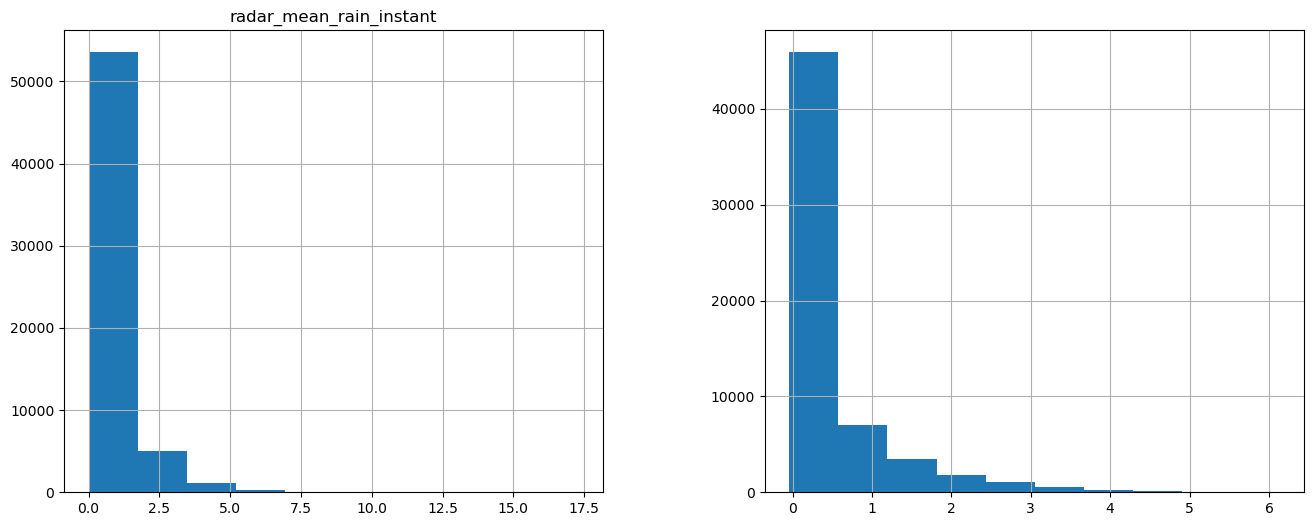

In [67]:
fig1 = matplotlib.pyplot.figure(figsize=(16,6))
ax1 = fig1.add_subplot(1,2,1)
prd_y_test.hist(ax=ax1)
ax1 = fig1.add_subplot(1,2,2)
pandas.Series(prd_y_pred_fcnn.flatten()).hist(ax=ax1)

In [68]:
prd_mae_test_fcnn = sklearn.metrics.mean_absolute_error(prd_y_test, prd_y_pred_fcnn)
print(f'MAE: {prd_mae_test_fcnn:.3f}')


MAE: 0.409


### Train the 1D CNN

In [69]:
prd_model = build_model_cnn1d(prd_nprof_features, prd_nheights, prd_nsinglvl_features)
prd_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 profile_input (InputLayer)     [(None, 33, 2)]      0           []                               
                                                                                                  
 zero_padding1d (ZeroPadding1D)  (None, 35, 2)       0           ['profile_input[0][0]']          
                                                                                                  
 conv1d (Conv1D)                (None, 33, 32)       192         ['zero_padding1d[0][0]']         
                                                                                                  
 zero_padding1d_1 (ZeroPadding1  (None, 35, 32)      0           ['conv1d[0][0]']                 
 D)                                                                                           

In [70]:
optimizer = tensorflow.keras.optimizers.Adam(learning_rate=0.001)
prd_model.compile(loss='mean_absolute_error', optimizer=optimizer)

In [71]:
%%time
prd_history = prd_model.fit(prd_X_train_cnn, 
                        prd_y_train, 
                        epochs=10, 
                        batch_size=32, 
                        validation_split=0.25, 
                        verbose=True, 
                       )

Epoch 1/10
5649/5649 [==============================] - 74s 13ms/step - loss: 0.4843 - val_loss: 0.4614
Epoch 2/10
5649/5649 [==============================] - 70s 12ms/step - loss: 0.4522 - val_loss: 0.4511
Epoch 3/10
5649/5649 [==============================] - 70s 12ms/step - loss: 0.4355 - val_loss: 0.4390
Epoch 4/10
5649/5649 [==============================] - 72s 13ms/step - loss: 0.4245 - val_loss: 0.4314
Epoch 5/10
5649/5649 [==============================] - 73s 13ms/step - loss: 0.4167 - val_loss: 0.4228
Epoch 6/10
5649/5649 [==============================] - 73s 13ms/step - loss: 0.4096 - val_loss: 0.4130
Epoch 7/10
5649/5649 [==============================] - 73s 13ms/step - loss: 0.4038 - val_loss: 0.4107
Epoch 8/10
5649/5649 [==============================] - 73s 13ms/step - loss: 0.3986 - val_loss: 0.4116
Epoch 9/10
5649/5649 [==============================] - 73s 13ms/step - loss: 0.3948 - val_loss: 0.4128
Epoch 10/10
5649/5649 [==============================] - 73s 13m

#### Make predictions with the trained data
Once we have trained out neural network, then we need to test it.

In [72]:
prd_y_pred = prd_model.predict(prd_X_test_cnn)


1883/1883 [==============================] - 6s 3ms/step


<Axes: >

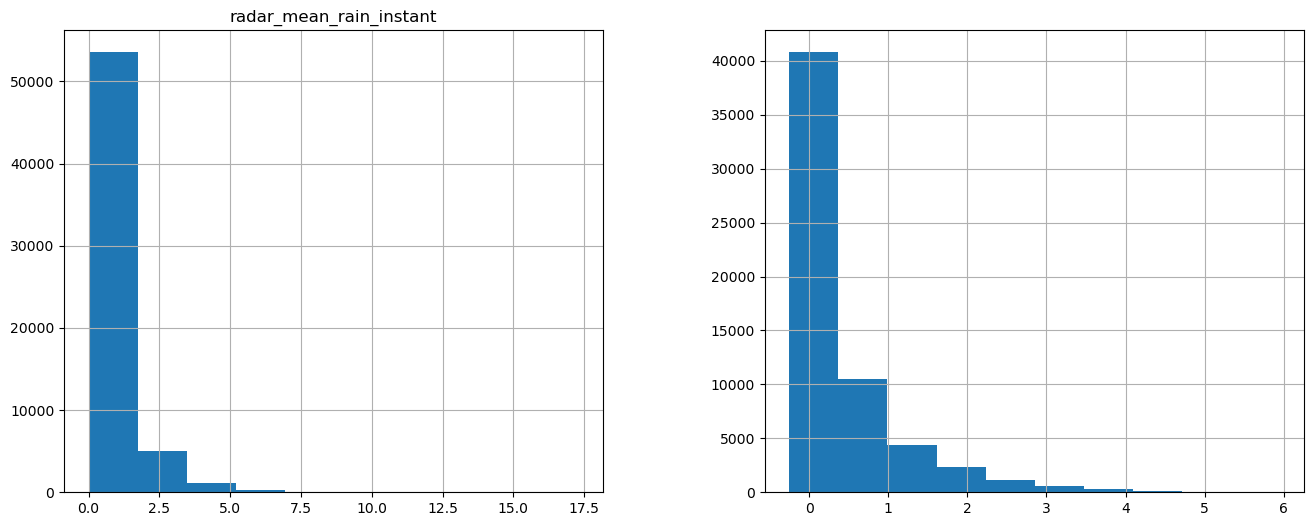

In [73]:
fig1 = matplotlib.pyplot.figure(figsize=(16,6))
ax1 = fig1.add_subplot(1,2,1)
prd_y_test.hist(ax=ax1)
ax1 = fig1.add_subplot(1,2,2)
pandas.Series(prd_y_pred.flatten()).hist(ax=ax1)

In [74]:
prd_y_pred.min(), prd_y_pred.max(), prd_y_test.min(), prd_y_test.max()

(-0.25030154,
 5.947673,
 radar_mean_rain_instant    0.000071
 dtype: float64,
 radar_mean_rain_instant    17.307049
 dtype: float64)

In [75]:
prd_mae_test = sklearn.metrics.mean_absolute_error(prd_y_test, prd_y_pred)
print(f'MAE: {prd_mae_test:.3f}')


MAE: 0.404


In [76]:
prd_rsqrd_test = sklearn.metrics.r2_score(prd_y_test, prd_y_pred)
print(f'R-squared score: {prd_rsqrd_test:.3f}')


R-squared score: 0.414


## Next steps

The information presented in this notebook hopefully helps you make appropriate choices of algorithm and metrics for your machine learning pipeline. This is not an easy or straight forward process, often relying on previous experience and the developed intuition that comes with it. The following articles provide further guidance on this process:
* [scikit-learn choosing the right estimator](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html)
* [How to choose the right algorithm - Towards Data Science](https://towardsdatascience.com/do-you-know-how-to-choose-the-right-machine-learning-algorithm-among-7-different-types-295d0b0c7f60)
* [Guide to Choosing the right ML Algorithm](https://medium.com/dataseries/an-easy-guide-to-choose-the-right-machine-learning-algorithm-for-your-task-b0f6d77aab75)
* [How to choose a ML algorithm - Some Guidelines](https://www.datasciencecentral.com/how-to-choose-a-machine-learning-model-some-guidelines/) 
* [ML Algorithm to Use - SAS](https://blogs.sas.com/content/subconsciousmusings/2020/12/09/machine-learning-algorithm-use/)

![scikit-learn How to choose an estimator](https://scikit-learn.org/stable/_static/ml_map.png)

![Choosing an ML algorithm](https://blogs.sas.com/content/subconsciousmusings/files/2017/04/machine-learning-cheet-sheet-2.png)



## Dataset Info

### XBT Data
This data is a preprocessed version of XBT profile data which is freely available from the [World Ocean Database](https://www.ncei.noaa.gov/products/world-ocean-database).
More information on the XBT data is available from the [WOD documentation](http://www.ncei.noaa.gov/sites/default/files/2020-04/wod_intro_0.pdf) from NOAA.

### ML Emulation of Socrates Radiation Scheme
Crown Copyright 2021 - This data was produced by Tom Dunstan as part of a project to emulate the [Socrates radiation scheme](https://code.metoffice.gov.uk/trac/socrates) used in the Unified Model, using machine learning. The data is the inputs and output from the UM radiation scheme as used for the emulation project.

### Falklands Rotors Challenge Dataset
Crown Copyright 2021 - This dataset was created by Met Office Chief Operational Meteorologist Steve Ramsdale from Met Office forecast and observation data.
* Model Data - Met Office Global 10km resolution model
* Observations - made by meteorologists at Mount Pleasant airfield in the Falkland Islands.


## References

### Decision trees
* [Introduction to decision trees - Masters in Data Science](https://www.mastersindatascience.org/learning/introduction-to-machine-learning-algorithms/decision-tree/#:~:text=A)
* [Decision Trees Explained - Towards Data Science](https://towardsdatascience.com/decision-trees-explained-3ec41632ceb6)
* Random Forests
* [Mathematics of Random Forests](https://towardsdatascience.com/the-mathematics-of-decision-trees-random-forest-and-feature-importance-in-scikit-learn-and-spark-f2861df67e3)

### Neural Networks
* [Introduction to Neural Networks - Kaggle](https://www.kaggle.com/code/carlosaguayo/introduction-to-neural-networks/notebook)
* [Back propagation - wikipedia](https://en.wikipedia.org/wiki/Backpropagation)
* [Back propagation - brilliant wiki](https://brilliant.org/wiki/backpropagation/#:~:text=Backpropagation%2C%20short%20for%20%22backward%20propagation,to%20the%20neural%20network's%20weights)
* [Detailed explanation of back propagation](http://neuralnetworksanddeeplearning.com/chap2.html)
* [Introduction to Deep Learning - Kaggle](https://www.kaggle.com/learn/intro-to-deep-learning)
* [Introduction to Neural Networks - IBM](https://www.ibm.com/cloud/learn/neural-networks)
* [Neural Networks - MIT](https://news.mit.edu/2017/explained-neural-networks-deep-learning-0414)
* [Build an RNN in Keras](https://pythonalgos.com/build-a-simple-recurrent-neural-network-with-keras/)
* [RNN Kaggle Tutorial](https://victorzhou.com/blog/keras-rnn-tutorial/)
* [What is an LSTM cell?](https://tung2389.github.io/coding-note/unitslstm)
* [Intro to Convolutional Neural Networks (CNNs)](https://towardsdatascience.com/a-comprehensive-guide-to-convolutional-neural-networks-the-eli5-way-3bd2b1164a53)

### Metrics
* [Regression and Classification metrics - scikit-learn](https://scikit-learn.org/stable/modules/model_evaluation.html)